# VGG Pretrained Model using Pytorch

### Imports

In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import json

### Model Loading

In [2]:
# Load a pretrained VGG-16 model
model = models.vgg16(pretrained=True)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 128MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Image Transformations & Class Labels

In [3]:
# Load class labels
with open("/content/imagenet_classes.txt") as f:
    class_names = [line.strip() for line in f.readlines()]

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

### Image Preprocessing

In [4]:
# Load an image and preprocess it
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

### Model Inferencing

In [5]:
# Perform inference
def infer(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top5_prob, top5_catid = probabilities.topk(5)
    results = [(class_names[catid], prob.item()) for catid, prob in zip(top5_catid, top5_prob)]
    return results

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image_path):
    image = Image.open(image_path)  # Open the image using PIL
    plt.imshow(image)  # Display the image
    plt.axis("off")  # Hide axes for better visualization
    plt.show()  # Show the image in the notebook

### Final Results

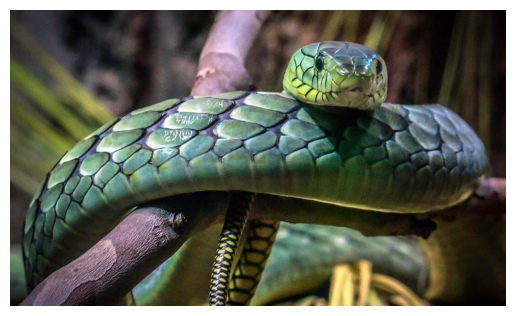

green mamba: 0.6968
green snake: 0.2624
vine snake: 0.0322
night snake: 0.0069
horned viper: 0.0004


In [7]:
# Example usage
image_path = "/content/green_mamba1.jpg"  # Replace with your image path
show_image(image_path)
results = infer(image_path)
for label, prob in results:
    print(f"{label}: {prob:.4f}")